In [1]:
import numpy as np
from numpy.random import shuffle
import matplotlib.pyplot as plt
import scipy.stats as stats

def gen_gaussian_data(N, dim=2, dist=1, stddev=1.0):
    # generate N random data vectors from two Gaussian clusters
    data = []
    # first cluster is always centered on [0, 0, 0, ...]
    cluster1mean = np.zeros(dim)
    cluster1size = N // 2
    for i in range(cluster1size):
        data.append(np.random.normal(cluster1mean, stddev, (dim)))

    # second cluster is placed along the vector dist*[1, 1, 1, ...]
    cluster2mean = np.zeros(dim) + dist
    for i in range(N-cluster1size):
        data.append(np.random.normal(cluster2mean, stddev, (dim)))
    return np.array(data), cluster1mean, cluster2mean


def plot_data(data):
    fig, ax = plt.subplots(figsize=[4,4])
    ax.scatter(data[:,0], data[:,1])
    ax.axvline(0, ls='--', c='grey')
    ax.axhline(0, ls='--', c='grey')
    plt.show()
    plt.close()

def plot_cluster(data, cluster0, cluster1):
    cluster0 = np.array(cluster0)
    cluster1 = np.array(cluster1)
    fig, ax = plt.subplots(figsize=[4,4])
    ax.scatter(cluster0[:,0], cluster0[:,1], c='r')
    ax.scatter(cluster1[:,0], cluster1[:,1], c='b')
    plt.show()
    plt.close()

In [2]:
from active_coresets.coreset_algorithms import bayesian_inference
from active_coresets.classical_algorithms import RandomSampler
from active_coresets.quantum_algorithms import ClassicalExponentialSampler, VQT, QAOA
from active_coresets.data_structures import Coreset, Model

from typing import List, Tuple

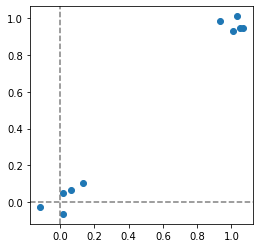

In [3]:
num_data = 10
data, c1, c2 = gen_gaussian_data(num_data, stddev=0.1)
shuffle(data)
plot_data(data)

In [4]:
class ClusteringModel(Model):
    def __init__(self, clusters: Tuple[List[np.ndarray], List[np.ndarray]]):
        self.clusters = clusters
        self.cluster0_center = np.average(clusters[0], axis=0) if len(clusters[0]) > 0 else [0.0, 0.0]
        self.cluster1_center = np.average(clusters[1], axis=0) if len(clusters[1]) > 0 else [0.0, 0.0]
    
    def evaluate_on_coreset(self, coreset: Coreset) -> float:
        total_dist = 0.0
        for data, weight in coreset.coreset:
            if any((data == x).all() for x in self.clusters[0]):
                total_dist += weight * np.linalg.norm(data - self.cluster0_center)
            else:
                total_dist += weight * np.linalg.norm(data - self.cluster1_center)
        return -total_dist
        

In [5]:
Y = []
for model_bitstring in range(2**(num_data)):
    cluster0 = []
    cluster1 = []
    for i in range(num_data):
        if (model_bitstring >> i) & 0x1 == 0:
            cluster0.append(data[i])
        else:
            cluster1.append(data[i])
    Y.append(ClusteringModel((cluster0, cluster1)))

Cost at step 0: -0.5456360749407901
Cost at step 20: -0.6310694623148403
Cost at step 40: -0.8518728055498361
Cost at step 60: -0.8973585312845345
Cost at step 80: -0.9610448017831208
Cost at step 100: -1.3222067041405934
Cost at step 120: -1.307486348567072
Cost at step 140: -1.378544064861352
Cost at step 160: -1.3833064425688109
Cost at step 180: -1.3855000269483457
Cost at step 200: -1.3861437950617161
Cost at step 220: -1.386287464128672
Cost at step 240: -1.3862928466471995
Cost at step 260: -1.3862941003367277
Cost at step 280: -1.3862942978076696
Cost at step 300: -1.3862943170569646
Cost at step 320: -1.386294348278326
Cost at step 340: -1.3862943582718996
 final_simplex: (array([[4.6314185 , 0.58935767, 0.33049771, 2.57045471, 0.44898334,
        4.36108535, 4.47461368, 0.69314295, 0.69312371],
       [4.63143459, 0.5893585 , 0.3304974 , 2.57043413, 0.44898187,
        4.36112056, 4.47460006, 0.69313157, 0.69316905],
       [4.63140119, 0.58935504, 0.3304966 , 2.57046648, 0.4

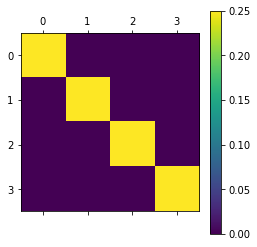

Final Entropy: 1.386294360835595
Final Expectation Value: -3.2265414395826753e-06
Final Cost: -1.386294360835595
11
1111111111
Cost at step 0: -1.1702041090477304
Cost at step 20: -1.1904208439839832
Cost at step 40: -1.2870631927397098
Cost at step 60: -1.5959621428117223
Cost at step 80: -1.5912254107378634
Cost at step 100: -1.692087541622171
Cost at step 120: -1.7094908921911853
Cost at step 140: -1.7547469385058467
Cost at step 160: -1.7768731615421296
Cost at step 180: -1.8354108686143515
Cost at step 200: -1.817083303317962
Cost at step 220: -1.8960670752640738
Cost at step 240: -1.963640133147829
Cost at step 260: -2.0581515561048556
Cost at step 280: -2.0433226890678995
Cost at step 300: -2.0760808595460754
Cost at step 320: -2.0786424971750788
Cost at step 340: -2.0784384879579196
Cost at step 360: -2.0793792504933006
Cost at step 380: -2.079331824965302
Cost at step 400: -2.079391248647193
Cost at step 420: -2.079431742600581
Cost at step 440: -2.079438796773998
Cost at step

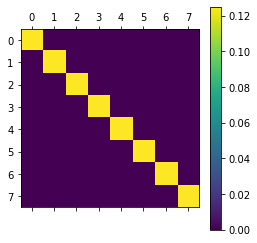

Final Entropy: 2.079441541674785
Final Expectation Value: 1.985817800198575e-07
Final Cost: -2.079441541674785
101
1000101101
Cost at step 0: -0.9620022633650093
Cost at step 20: -0.9800628912382374
Cost at step 40: -1.0113556704237978
Cost at step 60: -1.1052885570954023
Cost at step 80: -1.3011639794892103
Cost at step 100: -1.4878174126487247
Cost at step 120: -1.5375058990478894
Cost at step 140: -1.5771786393799203
Cost at step 160: -1.5881798633866162
Cost at step 180: -1.6700779340918002
Cost at step 200: -1.821433272351935
Cost at step 220: -2.1460738731557676
Cost at step 240: -2.0591485721369294
Cost at step 260: -2.174926121203505
Cost at step 280: -2.190557525667027
Cost at step 300: -2.210426929968693
Cost at step 320: -2.207949315947589
Cost at step 340: -2.3000331845952853
Cost at step 360: -2.4685456803036097
Cost at step 380: -2.6804520438431676
Cost at step 400: -2.697880685380848
Cost at step 420: -2.7119421038159457
Cost at step 440: -2.7346822101316577
Cost at step

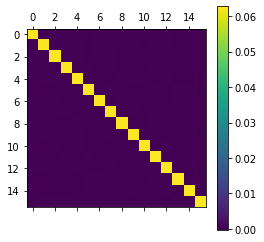

Final Entropy: 2.77255329418327
Final Expectation Value: 0.00016356845418219468
Final Cost: -2.77255329418327
0101
0111010010
Cost at step 0: -0.5113312102097431
Cost at step 20: -0.5072825664424558
Cost at step 40: -0.5423291938612724
Cost at step 60: -0.5829552729182
Cost at step 80: -0.6374735022540141
Cost at step 100: -0.7763047488556216
Cost at step 120: -0.9074371979060092
Cost at step 140: -0.8570571374182868
Cost at step 160: -0.934845909675591
Cost at step 180: -0.9515200718455632
Cost at step 200: -0.9692978439245061
Cost at step 220: -1.0059352513859638
Cost at step 240: -1.0294409270908127
Cost at step 260: -1.15709393241651
Cost at step 280: -1.2812055065131545
Cost at step 300: -1.5499248329737632
Cost at step 320: -2.0810454966827727
Cost at step 340: -2.4804222167478382
Cost at step 360: -2.272238127693586
Cost at step 380: -2.5319876081751342
Cost at step 400: -2.5656325098529513
Cost at step 420: -2.610183574697034
Cost at step 440: -2.6227299519945095
Cost at step 4

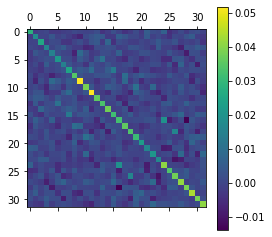

Final Entropy: 2.865561545785031
Final Expectation Value: 0.16035146493751518
Final Cost: -2.865561545785031
01001
1000101101


In [12]:
A = RandomSampler()
B = VQT(0)

final_model = bayesian_inference(list(data), Y, 6, A, B)

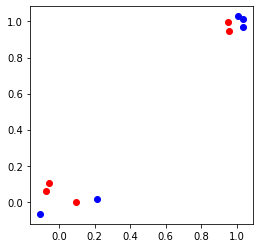

In [41]:
plot_cluster(data, final_model.clusters[0], final_model.clusters[1])

In [18]:
import importlib
import active_coresets
importlib.reload(active_coresets.quantum_algorithms)
from active_coresets.quantum_algorithms import ClassicalExponentialSampler, VQT, QAOA

In [21]:
A = RandomSampler()
B = QAOA(1)

final_model = bayesian_inference(list(data), Y, 4, A, B)

[(0, 1, 1.3373244038435128)]
[(1, array([1.06884097, 0.94556315])), (1, array([0.06054208, 0.06705879]))]
Current iteration: 0, Num function calls: 3, best so far: -0.8077278
Current iteration: 1, Num function calls: 4, best so far: -0.8077278
Current iteration: 2, Num function calls: 6, best so far: -1.1392916
Current iteration: 3, Num function calls: 7, best so far: -1.1392916
Current iteration: 4, Num function calls: 9, best so far: -1.1686511
Current iteration: 5, Num function calls: 11, best so far: -1.1686511
Current iteration: 6, Num function calls: 13, best so far: -1.1900001
Current iteration: 7, Num function calls: 15, best so far: -1.2484738
Current iteration: 8, Num function calls: 19, best so far: -1.2484738
Current iteration: 9, Num function calls: 21, best so far: -1.2484738
Current iteration: 10, Num function calls: 25, best so far: -1.2484738
Current iteration: 11, Num function calls: 29, best so far: -1.2484738
Current iteration: 12, Num function calls: 33, best so fa

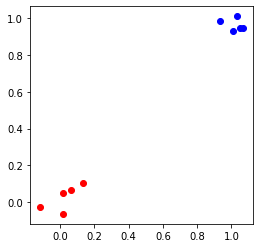

In [22]:
plot_cluster(data, final_model.clusters[0], final_model.clusters[1])